In [42]:
from warnings import filterwarnings
filterwarnings('ignore')
import pandas as pd
import numpy as np
import yfinance as yf
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt
import seaborn as sns
from ta.momentum import RSIIndicator

In [3]:
data = [
    {"Company": "Entergy Corporation", "Symbol": "ETR", "Location": "New Orleans, Louisiana, United States"},
    {"Company": "NextEra Energy, Inc.", "Symbol": "NEE", "Location": "Juno Beach, Florida, United States"},
    {"Company": "Dominion Energy, Inc.", "Symbol": "D", "Location": "Richmond, Virginia, United States"},
    {"Company": "Duke Energy Corporation", "Symbol": "DUK", "Location": "Charlotte, North Carolina, United States"},
    {"Company": "Southern Company", "Symbol": "SO", "Location": "Atlanta, Georgia, United States"},
    {"Company": "Exelon Corporation", "Symbol": "EXC", "Location": "Chicago, Illinois, United States"},
    {"Company": "American Electric Power Company, Inc.", "Symbol": "AEP", "Location": "Columbus, Ohio, United States"},
    {"Company": "Xcel Energy Inc.", "Symbol": "XEL", "Location": "Minneapolis, Minnesota, United States"},
    {"Company": "FirstEnergy Corp.", "Symbol": "FE", "Location": "Akron, Ohio, United States"},
    {"Company": "NRG Energy, Inc.", "Symbol": "NRG", "Location": "Princeton, New Jersey, United States"},
    {"Company": "Entergy Corporation", "Symbol": "ETR", "Location": "New Orleans, Louisiana, United States"},
    {"Company": "Consolidated Edison, Inc.", "Symbol": "ED", "Location": "New York, New York, United States"},
    {"Company": "Public Service Enterprise Group Inc.", "Symbol": "PEG", "Location": "Newark, New Jersey, United States"},
    {"Company": "PPL Corporation", "Symbol": "PPL", "Location": "Allentown, Pennsylvania, United States"},
    {"Company": "Fortis Inc.", "Symbol": "FTS", "Location": "St. John's, Newfoundland and Labrador, Canada"},
    #{"Company": "Hydro-Québec", "Symbol": "HQ", "Location": "Montreal, Quebec, Canada"},
    {"Company": "Edison International", "Symbol": "EIX", "Location": "Rosemead, California, United States"},
    {"Company": "Ameren Corporation", "Symbol": "AEE", "Location": "St. Louis, Missouri, United States"},
    {"Company": "Avangrid, Inc.", "Symbol": "AGR", "Location": "Orange, Connecticut, United States"},
    {"Company": "Eversource Energy", "Symbol": "ES", "Location": "Springfield, Massachusetts, United States"},
    {"Company": "Pinnacle West Capital Corporation", "Symbol": "PNW", "Location": "Phoenix, Arizona, United States"},
    {"Company": "AES Corporation", "Symbol": "AES", "Location": "Arlington, Virginia, United States"},
    {"Company": "CMS Energy Corporation", "Symbol": "CMS", "Location": "Jackson, Michigan, United States"},
    {"Company": "Vistra Corp.", "Symbol": "VST", "Location": "Irving, Texas, United States"},
    {"Company": "Eaton Corporation plc", "Symbol": "ETN", "Location": "Dublin, Ireland (with operations in North America)"},
    {"Company": "NiSource Inc.", "Symbol": "NI", "Location": "Merrillville, Indiana, United States"},
    {"Company": "TransAlta Renewables Inc.", "Symbol": "RNW.TO", "Location": "Calgary, Alberta, Canada"},
    #{"Company": "Pattern Energy Group Inc.", "Symbol": "PEGI", "Location": "San Francisco, California, United States"},
    {"Company": "Brookfield Renewable Partners L.P.", "Symbol": "BEP-UN.TO", "Location": "Toronto, Ontario, Canada"},
    {"Company": "Atlantica Sustainable Infrastructure plc", "Symbol": "AY", "Location": "London, United Kingdom (North America)"},
    #{"Company": "Calpine Corporation", "Symbol": "CPN", "Location": "Houston, Texas, United States"}
]
Electric_Company = pd.DataFrame(data)
Electric_Company


,Company,Symbol,Location
0,Entergy Corporation,ETR,"New Orleans, Louisiana, United States"
1,"NextEra Energy, Inc.",NEE,"Juno Beach, Florida, United States"
2,"Dominion Energy, Inc.",D,"Richmond, Virginia, United States"
3,Duke Energy Corporation,DUK,"Charlotte, North Carolina, United States"
4,Southern Company,SO,"Atlanta, Georgia, United States"
5,Exelon Corporation,EXC,"Chicago, Illinois, United States"
6,"American Electric Power Company, Inc.",AEP,"Columbus, Ohio, United States"
7,Xcel Energy Inc.,XEL,"Minneapolis, Minnesota, United States"
8,FirstEnergy Corp.,FE,"Akron, Ohio, United States"
9,"NRG Energy, Inc.",NRG,"Princeton, New Jersey, United States"


In [4]:
Symbols = Electric_Company['Symbol'].to_list()
cap=[]
industry = []
for symbol in Symbols:
    stock = yf.Ticker(symbol)
    info = stock.info
    cap.append(info['marketCap'])
    industry.append(info['industry'])
Electric_Company['Market Capitalization'] = cap
Electric_Company['Market Capitalization'] = Electric_Company['Market Capitalization']/1000000000
Electric_Company['Industry'] = industry
Electric_Company

,Company,Symbol,Location,Market Capitalization,Industry
0,Entergy Corporation,ETR,"New Orleans, Louisiana, United States",19.945798,Utilities—Regulated Electric
1,"NextEra Energy, Inc.",NEE,"Juno Beach, Florida, United States",135.043047,Utilities—Regulated Electric
2,"Dominion Energy, Inc.",D,"Richmond, Virginia, United States",39.849304,Utilities—Regulated Electric
3,Duke Energy Corporation,DUK,"Charlotte, North Carolina, United States",68.984914,Utilities—Regulated Electric
4,Southern Company,SO,"Atlanta, Georgia, United States",73.274876,Utilities—Regulated Electric
5,Exelon Corporation,EXC,"Chicago, Illinois, United States",39.245693,Utilities—Regulated Electric
6,"American Electric Power Company, Inc.",AEP,"Columbus, Ohio, United States",40.071332,Utilities—Regulated Electric
7,Xcel Energy Inc.,XEL,"Minneapolis, Minnesota, United States",31.535397,Utilities—Regulated Electric
8,FirstEnergy Corp.,FE,"Akron, Ohio, United States",20.392997,Utilities—Regulated Electric
9,"NRG Energy, Inc.",NRG,"Princeton, New Jersey, United States",8.416131,Utilities—Independent Power Producers


In [5]:
import yfinance as yf

symbol = "NEE"  # Remplacez par le symbole boursier approprié
stock = yf.Ticker(symbol)
info = stock.info
#pd.DataFrame(info)
#print(len(info))
#Affichez les clés disponibles dans le dictionnaire info
print(info.keys())

dict_keys(['address1', 'city', 'state', 'zip', 'country', 'phone', 'website', 'industry', 'industryDisp', 'sector', 'sectorDisp', 'longBusinessSummary', 'fullTimeEmployees', 'companyOfficers', 'auditRisk', 'boardRisk', 'compensationRisk', 'shareHolderRightsRisk', 'overallRisk', 'governanceEpochDate', 'compensationAsOfEpochDate', 'maxAge', 'priceHint', 'previousClose', 'open', 'dayLow', 'dayHigh', 'regularMarketPreviousClose', 'regularMarketOpen', 'regularMarketDayLow', 'regularMarketDayHigh', 'dividendRate', 'dividendYield', 'exDividendDate', 'payoutRatio', 'fiveYearAvgDividendYield', 'beta', 'trailingPE', 'forwardPE', 'volume', 'regularMarketVolume', 'averageVolume', 'averageVolume10days', 'averageDailyVolume10Day', 'bid', 'ask', 'bidSize', 'askSize', 'marketCap', 'fiftyTwoWeekLow', 'fiftyTwoWeekHigh', 'priceToSalesTrailing12Months', 'fiftyDayAverage', 'twoHundredDayAverage', 'trailingAnnualDividendRate', 'trailingAnnualDividendYield', 'currency', 'enterpriseValue', 'profitMargins', '

In [6]:
Symbols = Electric_Company['Symbol'].to_list()
cap=[]
for symbol in Symbols:
    stock = yf.Ticker(symbol)
    info = stock.info
    cap.append(info['sectorDisp'])
cap

['Utilities',
 'Utilities',
 'Utilities',
 'Utilities',
 'Utilities',
 'Utilities',
 'Utilities',
 'Utilities',
 'Utilities',
 'Utilities',
 'Utilities',
 'Utilities',
 'Utilities',
 'Utilities',
 'Utilities',
 'Utilities',
 'Utilities',
 'Utilities',
 'Utilities',
 'Utilities',
 'Utilities',
 'Utilities',
 'Utilities',
 'Industrials',
 'Utilities',
 'Utilities',
 'Utilities',
 'Utilities']

In [7]:
Electric_Company.sort_values(by = 'Market Capitalization', ascending = False)

,Company,Symbol,Location,Market Capitalization,Industry
1,"NextEra Energy, Inc.",NEE,"Juno Beach, Florida, United States",135.043047,Utilities—Regulated Electric
23,Eaton Corporation plc,ETN,"Dublin, Ireland (with operations in North Amer...",85.079179,Specialty Industrial Machinery
4,Southern Company,SO,"Atlanta, Georgia, United States",73.274876,Utilities—Regulated Electric
3,Duke Energy Corporation,DUK,"Charlotte, North Carolina, United States",68.984914,Utilities—Regulated Electric
6,"American Electric Power Company, Inc.",AEP,"Columbus, Ohio, United States",40.071332,Utilities—Regulated Electric
2,"Dominion Energy, Inc.",D,"Richmond, Virginia, United States",39.849304,Utilities—Regulated Electric
5,Exelon Corporation,EXC,"Chicago, Illinois, United States",39.245693,Utilities—Regulated Electric
7,Xcel Energy Inc.,XEL,"Minneapolis, Minnesota, United States",31.535397,Utilities—Regulated Electric
11,"Consolidated Edison, Inc.",ED,"New York, New York, United States",30.507651,Utilities—Regulated Electric
12,Public Service Enterprise Group Inc.,PEG,"Newark, New Jersey, United States",29.907962,Utilities—Regulated Electric


In [8]:
Symbols_Regulated_Electric = Electric_Company[Electric_Company["Industry"]=="Utilities—Regulated Electric"]["Symbol"]
Symbols_Regulated_Electric = Symbols_Regulated_Electric.to_list()
Symbols_Regulated_Electric

['ETR',
 'NEE',
 'D',
 'DUK',
 'SO',
 'EXC',
 'AEP',
 'XEL',
 'FE',
 'ETR',
 'ED',
 'PEG',
 'PPL',
 'FTS',
 'EIX',
 'AEE',
 'AGR',
 'ES',
 'PNW',
 'CMS']

In [34]:
# Autoriser le téléchargement des données historiques depuis Yahoo Finance
yf.pdr_override()

# Date de début pour les données historiques
start_date = '2000-01-01'

# Récupération des données historiques des prix ajustés en clôture
stocks_prices = pdr.get_data_yahoo(Symbols_Regulated_Electric, start=start_date)['Adj Close']
stocks_prices

[*********************100%%**********************]  19 of 19 completed


,AEE,AEP,AGR,CMS,D,DUK,ED,EIX,ES,ETR,EXC,FE,FTS,NEE,PEG,PNW,PPL,SO,XEL
Date,,,,,,,,,,,,,,,,,,,
2000-01-03,10.945128,11.129497,NaN,14.224371,7.313039,14.116091,11.311298,12.484442,9.832810,10.082559,5.129291,7.610453,NaN,2.432440,6.468368,10.480750,3.755646,4.615688,7.176658
2000-01-04,10.945128,11.262262,NaN,14.405194,7.492868,14.335515,11.457923,12.608977,9.832810,10.107510,5.091436,7.610453,NaN,2.476665,6.515840,10.612858,3.850859,4.666412,7.341911
2000-01-05,11.368534,11.682654,NaN,14.796963,7.696674,14.920639,11.981601,13.418441,9.892223,10.531779,5.337492,7.890725,NaN,2.557747,6.681999,10.899106,3.935493,4.907340,7.625194
2000-01-06,11.326196,11.749038,NaN,14.676417,7.780588,15.322906,12.002543,13.387308,10.011055,10.332122,5.346954,7.912282,NaN,2.557747,6.705738,10.965156,3.882599,4.920019,7.554375
2000-01-07,11.495560,11.903921,NaN,15.007912,7.780588,15.725183,12.086330,13.947704,10.100170,10.332122,5.346954,7.955403,NaN,2.631458,6.658262,11.273415,3.956651,5.008784,7.554375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-15,78.760002,79.099998,34.180000,55.910000,47.799999,90.417908,87.680000,68.820000,64.260002,94.620003,39.590000,36.029999,39.264572,67.349998,59.430000,76.650002,25.480000,67.084816,58.119999
2023-08-16,79.529999,79.190002,34.470001,56.580002,48.080002,90.674995,88.830002,69.160004,64.419998,95.580002,39.810001,36.240002,39.393211,67.559998,60.340000,77.300003,25.360001,67.411438,58.430000
2023-08-17,79.190002,78.779999,34.320000,56.410000,48.090000,90.699997,88.250000,68.599998,64.379997,95.050003,39.959999,35.869999,39.413002,67.510002,60.400002,77.330002,25.150000,67.550003,58.169998


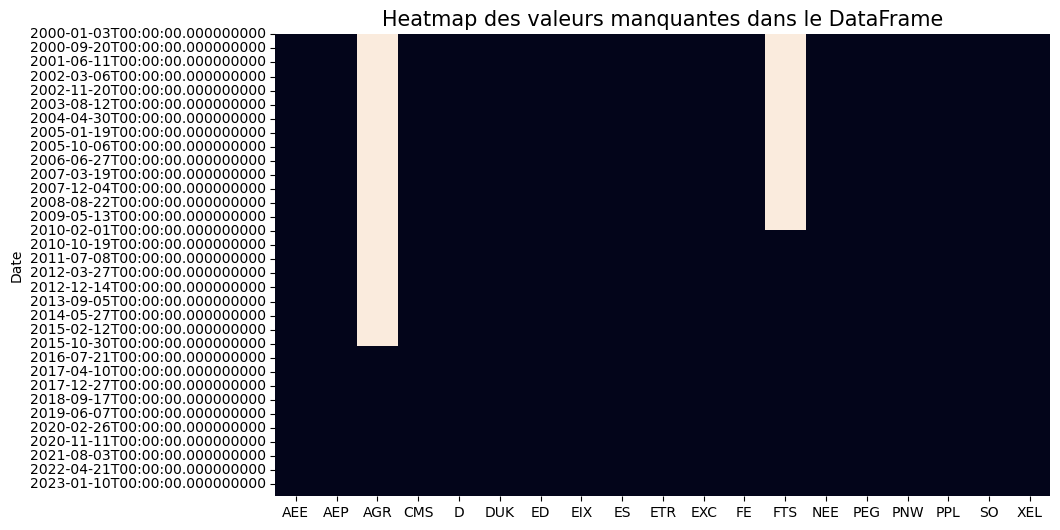

In [35]:
plt.figure(figsize=(10, 6))  # Définir la taille de la figure

# Créer une heatmap montrant les valeurs manquantes dans le DataFrame
sns.heatmap(stocks_prices.isnull(), cbar=False)

plt.title('Heatmap des valeurs manquantes dans le DataFrame', fontsize=15)
plt.show()


In [36]:
variables_manquantes = stocks_prices.isnull().sum(axis=0)
top_2_variables_manquantes = variables_manquantes.nlargest(2)

print("Noms des 2 variables ayant le plus de données manquantes:")
print(top_2_variables_manquantes)

Noms des 2 variables ayant le plus de données manquantes:
AGR    4015
FTS    2516
dtype: int64


In [37]:
# Liste des noms des variables à supprimer
variables_a_supprimer = top_2_variables_manquantes.index.tolist()

# Supprimer les variables de la base de données
stocks_prices = stocks_prices.drop(variables_a_supprimer, axis=1)

In [38]:
# Période de décalage
period = 5

# Calcul des rendements décalés de 5 jours pour toutes les autres actions
X_lags_5 = pd.concat(
    [stocks_prices[stk].shift(period).pct_change() for stk in stocks_prices.columns], 
    axis=1
)

# Renommer les colonnes avec le suffixe '_DT'
X_lags_5.columns = [i + '_DT' for i in stocks_prices.columns]

# Supprimer les lignes avec des valeurs manquantes
#X_lags.dropna(inplace=True)



# Afficher le DataFrame résultant
X_lags_5

,AEE_DT,AEP_DT,CMS_DT,D_DT,DUK_DT,ED_DT,EIX_DT,ES_DT,ETR_DT,EXC_DT,FE_DT,NEE_DT,PEG_DT,PNW_DT,PPL_DT,SO_DT,XEL_DT
Date,,,,,,,,,,,,,,,,,
2000-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-15,0.001724,-0.000742,0.006083,0.002646,0.027548,0.006290,0.010173,-0.002087,0.001543,0.002752,0.009967,0.001020,0.001488,0.006004,-0.000383,0.011614,-0.002008
2023-08-16,-0.004179,0.009001,-0.005010,0.008524,0.007489,-0.002522,-0.003121,0.005229,-0.004929,0.004241,-0.007950,0.003056,0.001981,0.011417,0.004981,0.005523,0.000838
2023-08-17,-0.006666,0.004584,-0.003299,0.003824,0.000970,-0.006047,-0.004696,-0.014118,0.003444,-0.001491,0.003040,-0.009141,-0.003130,-0.011031,-0.004956,0.003180,-0.003183


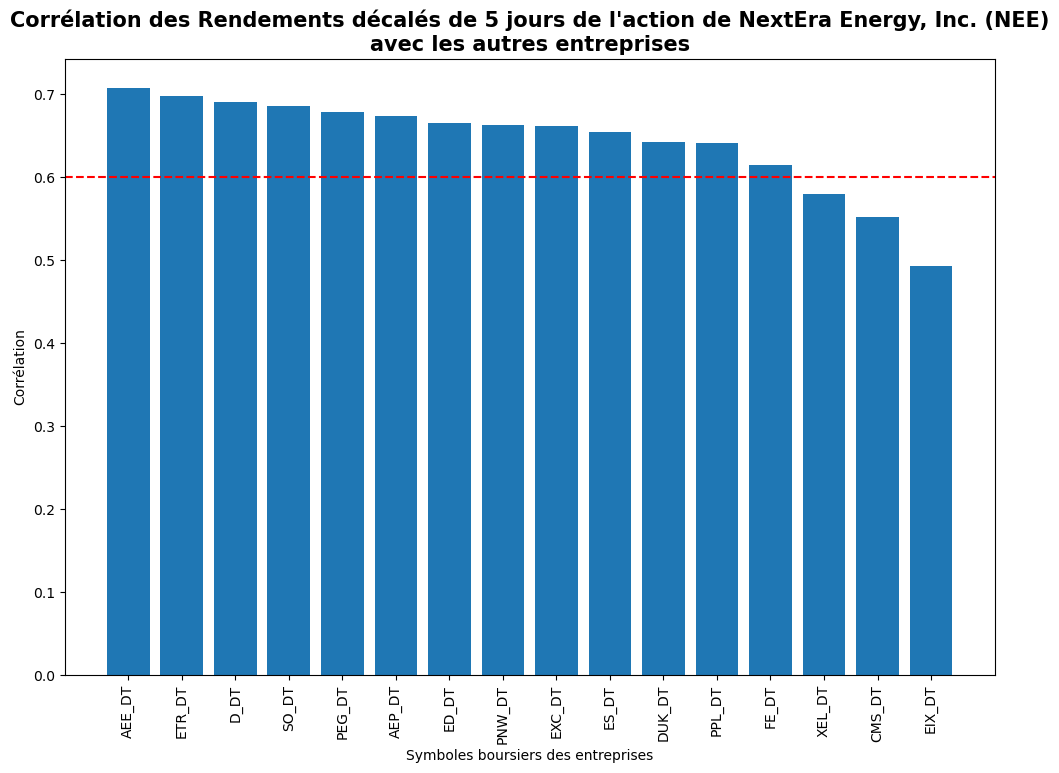

In [39]:
plt.figure(figsize=(12, 8))

# Calculer la matrice de corrélation pour les variables de X_lags
correlation_matrix = X_lags_5.corr()

# Calculer la corrélation de NEE_DT avec les autres variables
correlation_with_nee = correlation_matrix['NEE_DT']

# Ordonner les corrélations du plus grand au plus petit (en excluant NEE_DT)
correlation_sorted = correlation_with_nee.drop('NEE_DT').abs().sort_values(ascending=False)

plt.bar(correlation_sorted.index, correlation_sorted.values)
plt.axhline(y=0.6, color='r', linestyle='--', label='Seuil de corrélation')


plt.title("Corrélation des Rendements décalés de 5 jours de l'action de NextEra Energy, Inc. (NEE)\navec les autres entreprises", fontsize=15, fontweight="bold")
plt.xlabel('Symboles boursiers des entreprises')
plt.ylabel('Corrélation')
plt.xticks(rotation=90)
plt.show()




In [40]:
correlation_sup_6 = correlation_sorted[correlation_sorted>0.6].index
print(correlation_sup_6)
X_lags_5_corr_sup_6 = X_lags_5[correlation_sup_6.tolist()]
X_lags_5_corr_sup_6

Index(['AEE_DT', 'ETR_DT', 'D_DT', 'SO_DT', 'PEG_DT', 'AEP_DT', 'ED_DT',
       'PNW_DT', 'EXC_DT', 'ES_DT', 'DUK_DT', 'PPL_DT', 'FE_DT'],
      dtype='object')


,AEE_DT,ETR_DT,D_DT,SO_DT,PEG_DT,AEP_DT,ED_DT,PNW_DT,EXC_DT,ES_DT,DUK_DT,PPL_DT,FE_DT
Date,,,,,,,,,,,,,
2000-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-15,0.001724,0.001543,0.002646,0.011614,0.001488,-0.000742,0.006290,0.006004,0.002752,-0.002087,0.027548,-0.000383,0.009967
2023-08-16,-0.004179,-0.004929,0.008524,0.005523,0.001981,0.009001,-0.002522,0.011417,0.004241,0.005229,0.007489,0.004981,-0.007950
2023-08-17,-0.006666,0.003444,0.003824,0.003180,-0.003130,0.004584,-0.006047,-0.011031,-0.001491,-0.014118,0.000970,-0.004956,0.003040


In [43]:
import pandas as pd


def calculate_indicators(prices_closes, symbols, sma_periods, ema_periods, rsi_periods):
    indicators = pd.DataFrame()

    for symbol in symbols:
        # Calcul des indicateurs SMA et EMA pour chaque symbole
        for n in sma_periods:
            indicators[symbol + '_sma' + str(n)] = (prices_closes[symbol].rolling(window=n).mean()) / prices_closes[symbol]
            indicators[symbol + '_ema' + str(n)] = pd.Series(prices_closes[symbol].ewm(span=n, min_periods=n).mean()) / prices_closes[symbol]

        # Calcul de l'indicateur RSI pour chaque symbole
        for n in rsi_periods:
            rsi = RSIIndicator(prices_closes[symbol], window=n)
            indicators[symbol + '_RSI' + str(n)] = rsi.rsi()

    return indicators

# Liste des périodes pour les indicateurs SMA, EMA et RSI
sma_periods = [5, 14, 30, 50, 200]
ema_periods = [5, 14, 30, 50, 200]
rsi_periods = [5, 14, 30, 50, 200]

# Appel de la fonction pour calculer les indicateurs
X_indicators = calculate_indicators(stocks_prices, ['NEE'], sma_periods, ema_periods, rsi_periods)
X_indicators


,NEE_sma5,NEE_ema5,NEE_sma14,NEE_ema14,NEE_sma30,NEE_ema30,NEE_sma50,NEE_ema50,NEE_sma200,NEE_ema200,NEE_RSI5,NEE_RSI14,NEE_RSI30,NEE_RSI50,NEE_RSI200
Date,,,,,,,,,,,,,,,
2000-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-07,0.961905,0.975626,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.000000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-15,1.015709,1.014938,1.041638,1.037226,1.068340,1.059539,1.081883,1.074050,1.135882,1.119190,18.676391,29.359204,37.335384,41.253647,47.538845
2023-08-16,1.008526,1.007855,1.032363,1.029469,1.061373,1.052617,1.076735,1.067939,1.131865,1.114560,24.458748,30.932869,37.957229,41.589239,47.602113
2023-08-17,1.006962,1.005734,1.027477,1.026200,1.059438,1.049952,1.075793,1.066034,1.131954,1.114237,23.951931,30.757197,37.864688,41.531602,47.588381


In [44]:
def calculate_volume_features(symbol, start_date, n_window):
    # Créer un objet Ticker pour le symbole donné
    stock = yf.Ticker(symbol)

    # Obtenir les données historiques, y compris le volume, à partir de la date de commencement
    history = stock.history(start=start_date)

    # Sélectionner la colonne du volume
    volume = history['Volume']

    # Calculer la variation du volume (pct_change)
    volume_change = volume.pct_change()

    # Calculer la moyenne mobile de la variation du volume (rolling mean)
    volume_change_sma = volume_change.rolling(window=n_window).mean()

    # Créer un DataFrame pour stocker les caractéristiques liées au volume
    volume_features = pd.DataFrame()
    #volume_features['Volume'] = volume
    volume_features[symbol +'_Volume_Change'] = volume_change
    volume_features[symbol +'_Volume_Change_SMA_'+str(n_window)] = volume_change_sma

    return volume_features

# Exemple d'utilisation de la fonction
symbol = 'NEE'
start_date = '2000-01-01'
volume_features = calculate_volume_features(symbol, start_date,n_window=5)

# Afficher les premières lignes des caractéristiques liées au volume
volume_features.head

<bound method NDFrame.head of                            NEE_Volume_Change  NEE_Volume_Change_SMA_5
Date                                                                 
2000-01-03 00:00:00-05:00                NaN                      NaN
2000-01-04 00:00:00-05:00           0.339387                      NaN
2000-01-05 00:00:00-05:00           0.000292                      NaN
2000-01-06 00:00:00-05:00          -0.460720                      NaN
2000-01-07 00:00:00-05:00           1.702432                      NaN
...                                      ...                      ...
2023-08-15 00:00:00-04:00          -0.039546                -0.016769
2023-08-16 00:00:00-04:00          -0.164903                -0.017421
2023-08-17 00:00:00-04:00           0.037942                -0.023436
2023-08-18 00:00:00-04:00          -0.057940                 0.001153
2023-08-21 00:00:00-04:00          -0.650822                -0.175054

[5946 rows x 2 columns]>

In [52]:
# Feature ingénierie des dates

days_of_week = pd.get_dummies(
    X_lags_5.index.dayofweek, 
    prefix = 'weekday', 
    drop_first = True)

days_of_week.index = X_lags_5.index

days_of_week

,weekday_1,weekday_2,weekday_3,weekday_4
Date,,,,
2000-01-03,0,0,0,0
2000-01-04,1,0,0,0
2000-01-05,0,1,0,0
2000-01-06,0,0,1,0
2000-01-07,0,0,0,1
...,...,...,...,...
2023-08-15,1,0,0,0
2023-08-16,0,1,0,0
2023-08-17,0,0,1,0


In [62]:
volume_features.index = X_indicators.index 
combined_data = pd.concat([X_lags_5['NEE_DT'],X_indicators,volume_features,
                           X_lags_5_corr_sup_6,days_of_week],axis=1).dropna()
combined_data

,NEE_DT,NEE_sma5,NEE_ema5,NEE_sma14,NEE_ema14,NEE_sma30,NEE_ema30,NEE_sma50,NEE_ema50,NEE_sma200,...,PNW_DT,EXC_DT,ES_DT,DUK_DT,PPL_DT,FE_DT,weekday_1,weekday_2,weekday_3,weekday_4
Date,,,,,,,,,,,,,,,,,,,,,
2000-10-16,0.008815,0.976654,0.979100,0.958672,0.955236,0.918382,0.918691,0.865450,0.881905,0.713351,...,0.001272,-0.001104,0.003125,0.007639,-0.018377,-0.002475,0,0,0,0
2000-10-17,0.015533,0.987996,0.989080,0.967039,0.965027,0.928962,0.927904,0.873717,0.890450,0.718701,...,0.016519,0.039779,-0.012461,0.015163,0.032761,0.024814,1,0,0,0
2000-10-18,0.009560,0.995185,0.994552,0.973495,0.972013,0.937098,0.934967,0.880321,0.897123,0.722692,...,0.006250,-0.009565,-0.003154,0.001494,0.016617,0.000000,0,1,0,0
2000-10-19,-0.012311,1.032885,1.021869,1.010096,1.008145,0.976987,0.972803,0.918147,0.934310,0.752265,...,-0.007453,-0.013948,0.000000,-0.009695,-0.007429,-0.014528,0,0,1,0
2000-10-20,0.035475,1.025192,1.014579,1.006525,1.007059,0.980593,0.974557,0.922244,0.936887,0.754042,...,0.002503,0.008705,0.009494,0.025602,0.001496,0.007371,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-14,-0.007662,1.001750,1.004362,1.030568,1.024547,1.052903,1.044874,1.064685,1.058064,1.116339,...,-0.024943,0.001253,-0.002379,0.002236,0.001150,-0.004959,0,0,0,0
2023-08-15,0.001020,1.015709,1.014938,1.041638,1.037226,1.068340,1.059539,1.081883,1.074050,1.135882,...,0.006004,0.002752,-0.002087,0.027548,-0.000383,0.009967,1,0,0,0
2023-08-16,0.003056,1.008526,1.007855,1.032363,1.029469,1.061373,1.052617,1.076735,1.067939,1.131865,...,0.011417,0.004241,0.005229,0.007489,0.004981,-0.007950,0,1,0,0


pandas.core.frame.DataFrame

## Analyse Exploratoire des données 

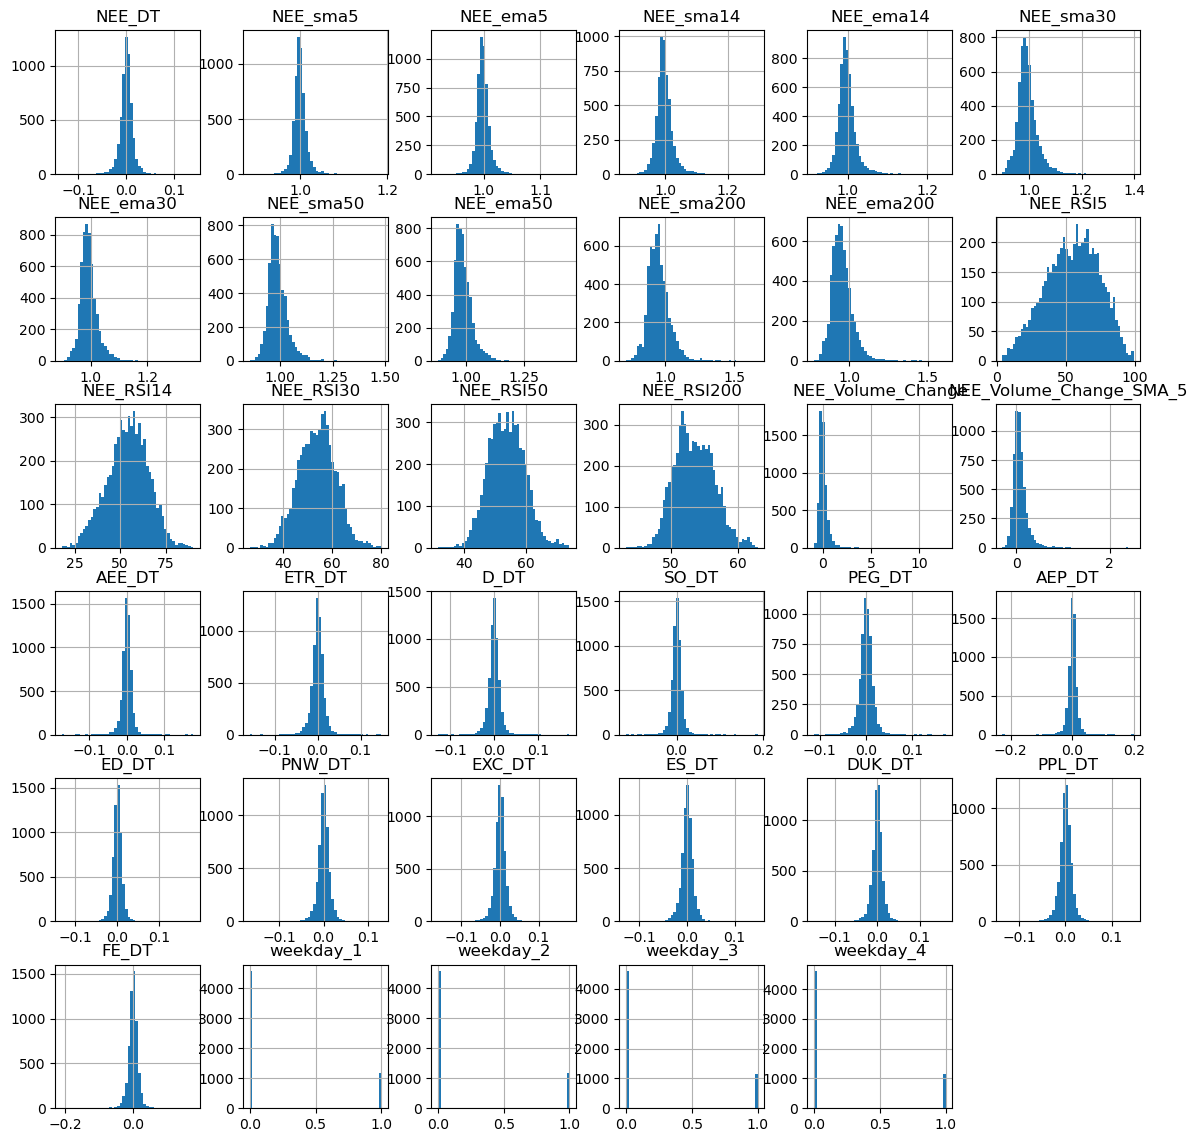

In [71]:
# Histogrammes

combined_data.hist(
    bins=50, 
    sharex=False, 
    sharey=False, 
    figsize=(14,14)
)

plt.show()

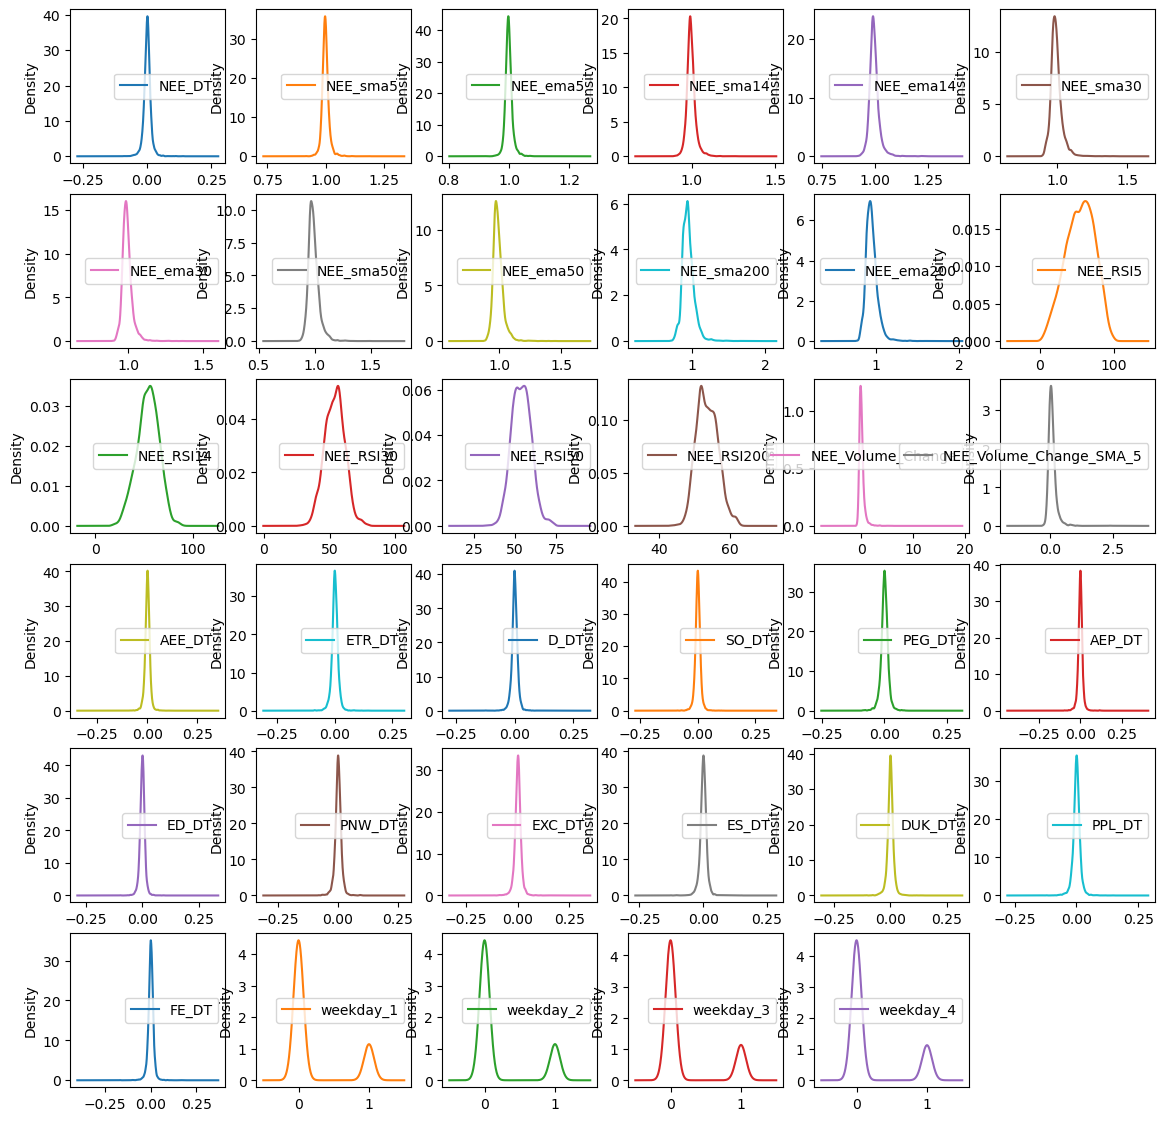

In [73]:
# Densités

combined_data.plot(
    kind = 'density',
    subplots = True,
    layout=(6,6),
    sharex=False, 
    sharey=False, 
    legend = True,
    figsize=(14,14)
)

plt.show()

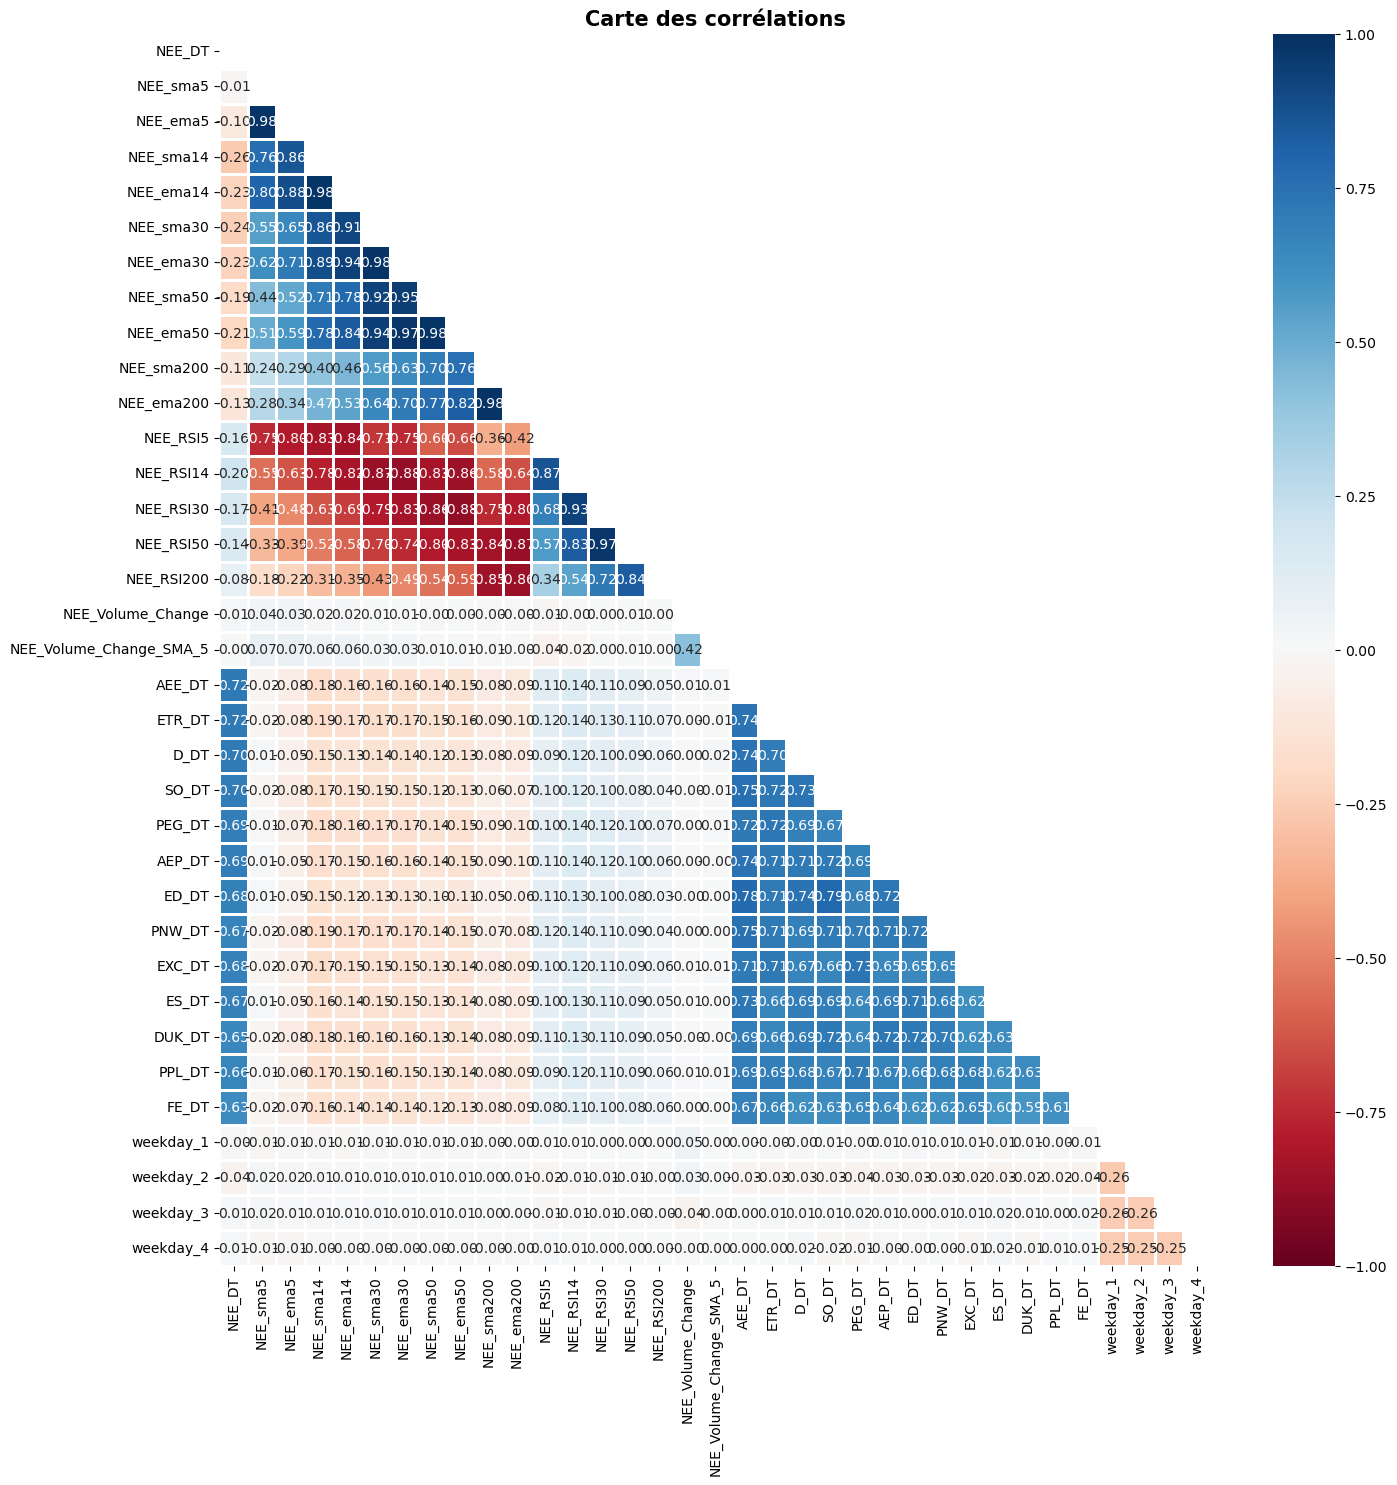

In [75]:
# Carte des corrélations

plt.figure(figsize=(16,16))

mask = np.triu(np.ones_like(combined_data.corr(), dtype=bool))

sns.heatmap(combined_data.corr(), 
            mask=mask, center=0, cmap='RdBu', linewidths=1, 
            annot=True, fmt=".2f", vmin=-1, vmax=1
)

plt.title('Carte des corrélations', fontsize=15, fontweight="bold")

plt.show()